In [1]:
##*********Machine Learning Program that Predicts Titanic Survivors*********##

In [2]:
#first let's import the libraries we need

In [101]:
import math 
import numpy as np
import pandas as pd
import matplotlib as plt 
import seaborn as sns 
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression

In [102]:
# We will use LogisticRegression
# LogisticRegression is a subset of Supervised Learning
# now let's first import our train and test data sets
df_train=pd.read_csv("train.csv")
df_test=pd.read_csv("test.csv")

In [103]:
df_train.head(10)
#We are examining the data in rows and columns!!

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [104]:
df_train.shape
# we saw the number of rows and columns in the data
# our target variable here is survived !!!

(891, 12)

In [105]:
df_test.shape

(418, 11)

In [106]:
# We will do Data Preprocessing now
# we need to clean our data before we train our model
# so we need to clean up nulls and fix different data types!!
df_train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [107]:
# we have 3 different columns with null values now we have these spaces different
# fill using methods

# Using the mean() value for the 1-age column, we fill it with their average
#2 - Cabin column has too many spaces so we don't have enough information
# so we can delete the cabin column because it won't help us in estimating
# 3-Embarked column has only 2 spaces, we use mode for this

# yes now here we decided how to fill in the blanks

In [108]:
df_train['Age'].fillna(df_train['Age'].mean(),inplace=True)
df_train =df_train.drop(['Cabin'],axis=1,inplace=False)
df_train['Embarked'].mode()

0    S
dtype: object

In [109]:
df_train.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       2
dtype: int64

In [110]:
df_train['Embarked'].fillna(df_train['Embarked'].mode()[0],inplace=True)

In [111]:
df_train.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

In [112]:
# we have filled in the missing data so far or the data that does not work
# extracted from the dataset

In [113]:
# now let's take a look at the life and death situations of the passengers
print("Total Passengers : ",df_train.shape[0])
print("Survived : ",df_train['Survived'].sum())

Total Passengers :  891
Survived :  342


In [114]:
df_train.info()
# we review basic information about our dataset here !!!

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Embarked     891 non-null    object 
dtypes: float64(2), int64(5), object(4)
memory usage: 76.7+ KB


In [115]:
df_train.describe().T

,count,mean,std,min,25%,50%,75%,max
PassengerId,891.0,446.000000,257.353842,1.00,223.5000,446.000000,668.5,891.0000
Survived,891.0,0.383838,0.486592,0.00,0.0000,0.000000,1.0,1.0000
Pclass,891.0,2.308642,0.836071,1.00,2.0000,3.000000,3.0,3.0000
Age,891.0,29.699118,13.002015,0.42,22.0000,29.699118,35.0,80.0000
SibSp,891.0,0.523008,1.102743,0.00,0.0000,0.000000,1.0,8.0000
Parch,891.0,0.381594,0.806057,0.00,0.0000,0.000000,0.0,6.0000
Fare,891.0,32.204208,49.693429,0.00,7.9104,14.454200,31.0,512.3292


In [116]:
df_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


In [117]:
###**************Veri Analysis**************##
df_train['Survived'].value_counts()

0    549
1    342
Name: Survived, dtype: int64

In [118]:
df_train['Pclass'].value_counts()

3    491
1    216
2    184
Name: Pclass, dtype: int64

In [119]:
df_train['Sex'].value_counts()

male      577
female    314
Name: Sex, dtype: int64

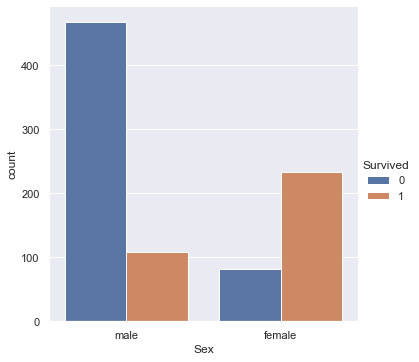

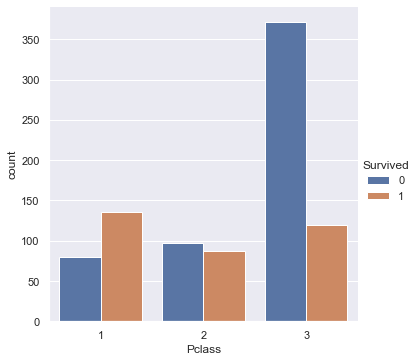

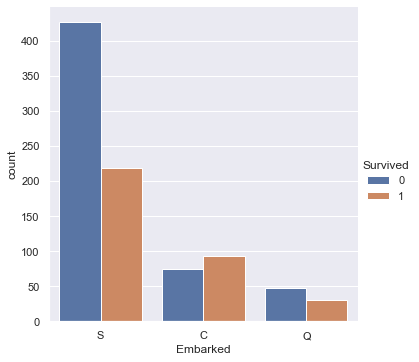

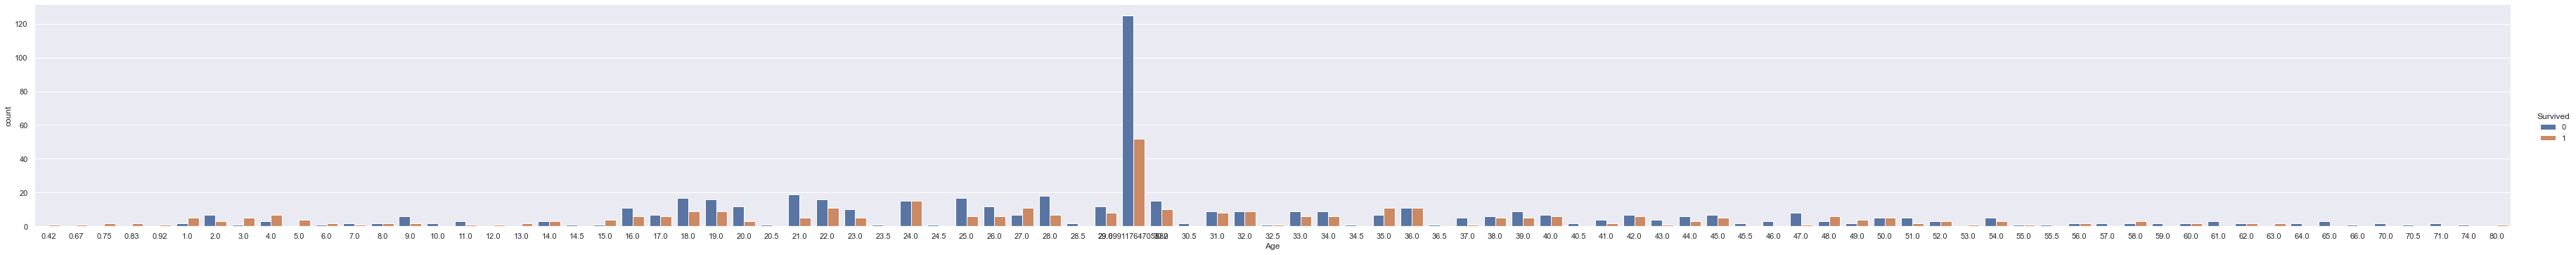

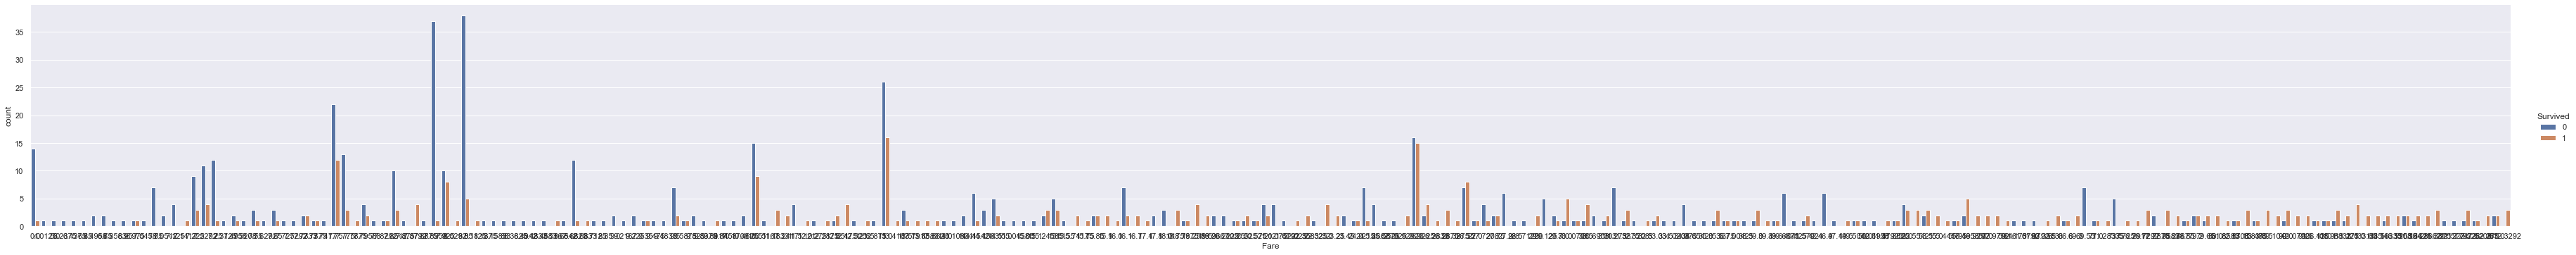

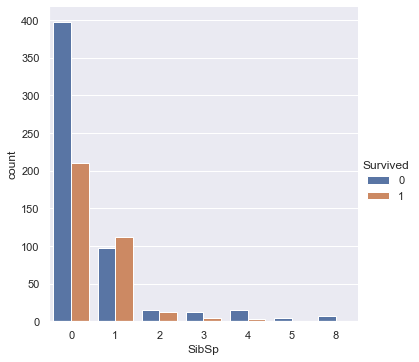

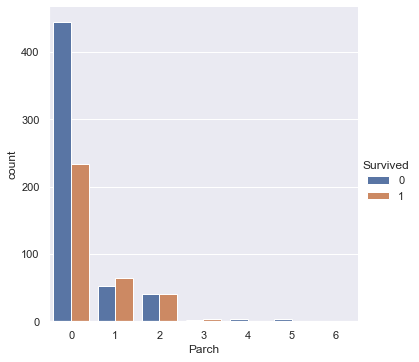

In [120]:
sns.catplot(data=df_train,x='Sex',hue='Survived',kind='count',height=5,aspect=1,legend_out=True)
sns.catplot(data=df_train,x='Pclass',hue='Survived',kind='count',height=5,aspect=1,legend_out=True)
sns.catplot(data=df_train,x='Embarked',hue='Survived',kind='count',height=5,aspect=1,legend_out=True)
sns.catplot(data=df_train,x='Age',hue='Survived',kind='count',height=5,aspect=10,legend_out=True)
sns.catplot(data=df_train,x='Fare',hue='Survived',kind='count',height=5,aspect=10,legend_out=True)
sns.catplot(data=df_train,x='SibSp',hue='Survived',kind='count',height=5,aspect=1,legend_out=True)
sns.catplot(data=df_train,x='Parch',hue='Survived',kind='count',height=5,aspect=1,legend_out=True)

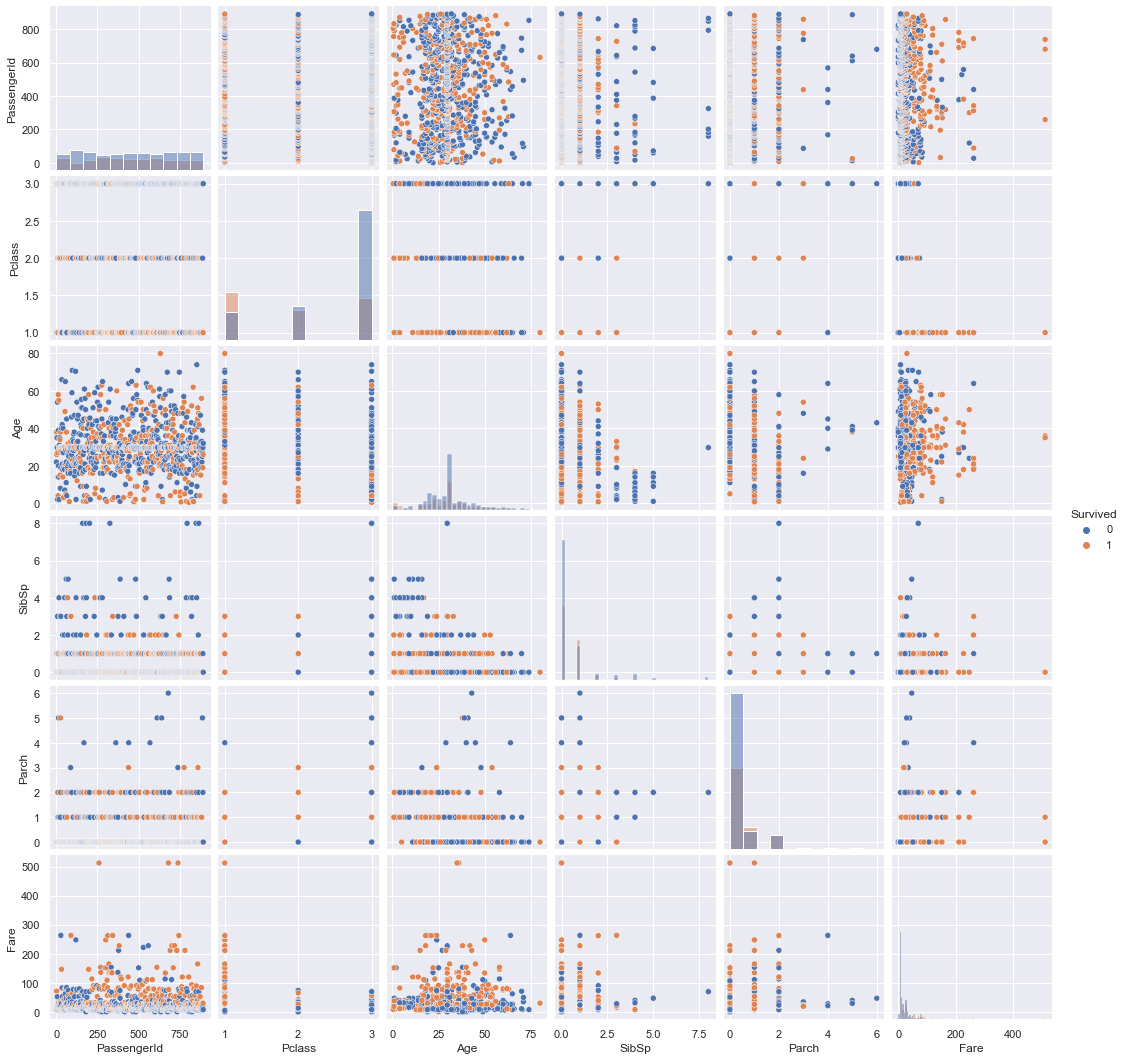

In [121]:
sns.pairplot(data=df_train,diag_kind="hist",hue='Survived')
# as can be seen from the graphs we can use gender and survival for a good distinction

In [122]:
sns.set() 

In [123]:
df_train['Survived'].value_counts()
# The df_train['Survived'].value_counts() code can be used for a specific dataframe in a DataFrame.
# is used to calculate the number of values in the column. In this example, df_train
# Calculates the number of values in the 'Survived' column of the DataFrame.

0    549
1    342
Name: Survived, dtype: int64

In [124]:
# The information in the Pclass column shows us that lower class passengers have less chance of survival
# Gender class is an important group for us so let's convert this group to numeric data type

In [125]:
df_train.replace(
    {'Sex':{'male':0,'female':1},
    'Embarked':{'C':1,'S':2,'Q':3}},
    inplace=True
)

In [126]:
df_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,2
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,1
2,3,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,2
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,53.1000,2
4,5,0,3,"Allen, Mr. William Henry",0,35.0,0,0,373450,8.0500,2


In [127]:
titan_train,titan_test=train_test_split(df_train)

In [128]:
titan_train

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
111,112,0,3,"Zabour, Miss. Hileni",1,14.500000,1,0,2665,14.4542,1
18,19,0,3,"Vander Planke, Mrs. Julius (Emelia Maria Vande...",1,31.000000,1,0,345763,18.0000,2
792,793,0,3,"Sage, Miss. Stella Anna",1,29.699118,8,2,CA. 2343,69.5500,2
846,847,0,3,"Sage, Mr. Douglas Bullen",0,29.699118,8,2,CA. 2343,69.5500,2
624,625,0,3,"Bowen, Mr. David John ""Dai""",0,21.000000,0,0,54636,16.1000,2
...,...,...,...,...,...,...,...,...,...,...,...
181,182,0,2,"Pernot, Mr. Rene",0,29.699118,0,0,SC/PARIS 2131,15.0500,1
317,318,0,2,"Moraweck, Dr. Ernest",0,54.000000,0,0,29011,14.0000,2
801,802,1,2,"Collyer, Mrs. Harvey (Charlotte Annie Tate)",1,31.000000,1,1,C.A. 31921,26.2500,2
289,290,1,3,"Connolly, Miss. Kate",1,22.000000,0,0,370373,7.7500,3


In [129]:
titan_train.shape

(668, 11)

In [130]:
titan_test

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
415,416,0,3,"Meek, Mrs. Thomas (Annie Louise Rowley)",1,29.699118,0,0,343095,8.0500,2
716,717,1,1,"Endres, Miss. Caroline Louise",1,38.000000,0,0,PC 17757,227.5250,1
847,848,0,3,"Markoff, Mr. Marin",0,35.000000,0,0,349213,7.8958,1
729,730,0,3,"Ilmakangas, Miss. Pieta Sofia",1,25.000000,1,0,STON/O2. 3101271,7.9250,2
569,570,1,3,"Jonsson, Mr. Carl",0,32.000000,0,0,350417,7.8542,2
...,...,...,...,...,...,...,...,...,...,...,...
884,885,0,3,"Sutehall, Mr. Henry Jr",0,25.000000,0,0,SOTON/OQ 392076,7.0500,2
749,750,0,3,"Connaghton, Mr. Michael",0,31.000000,0,0,335097,7.7500,3
320,321,0,3,"Dennis, Mr. Samuel",0,22.000000,0,0,A/5 21172,7.2500,2
661,662,0,3,"Badt, Mr. Mohamed",0,40.000000,0,0,2623,7.2250,1


In [131]:
titan_test.shape

(223, 11)

In [132]:
# Now here is our target variable 'Survived' because the prediction we want to make
# Survived
y_train=titan_train['Survived']

In [133]:
y_train

111    0
18     0
792    0
846    0
624    0
      ..
181    0
317    0
801    1
289    1
690    1
Name: Survived, Length: 668, dtype: int64

In [134]:
# Since the Survived class is the target variable, we exclude it from the X_train
# Name and Ticket classes won't help with guessing so we're removing them as well
X_train = titan_train.drop(columns=['Survived','Name','Ticket'],axis=0)

In [135]:
X_train.head()

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
111,112,3,1,14.500000,1,0,14.4542,1
18,19,3,1,31.000000,1,0,18.0000,2
792,793,3,1,29.699118,8,2,69.5500,2
846,847,3,0,29.699118,8,2,69.5500,2
624,625,3,0,21.000000,0,0,16.1000,2


In [136]:
# As you can see, we only have numerical values now
X_train.shape

(668, 8)

In [137]:
# now let's edit our test data
df_test=df_test.drop(['Cabin'],axis=1,inplace=False)

In [138]:
df_test.isnull().sum()

PassengerId     0
Pclass          0
Name            0
Sex             0
Age            86
SibSp           0
Parch           0
Ticket          0
Fare            1
Embarked        0
dtype: int64

In [139]:
# Let's edit the 'Age' and 'Embarked' classes
df_test['Age'].fillna(df_test['Age'].mean(),inplace=True)

In [140]:
df_test['Fare'].fillna(df_test['Fare'].interpolate(),inplace=True)

In [141]:
df_test.isnull().sum()

PassengerId    0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

In [142]:
df_test=df_test.drop(['Name','Ticket'],axis=1)

In [143]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Sex          418 non-null    object 
 3   Age          418 non-null    float64
 4   SibSp        418 non-null    int64  
 5   Parch        418 non-null    int64  
 6   Fare         418 non-null    float64
 7   Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(2)
memory usage: 26.2+ KB


In [144]:
df_test.replace(
    {'Sex':{'male':0,'female':1},
    'Embarked':{'C':1,"S":2,'Q':3}},
    inplace=True
)

In [145]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Sex          418 non-null    int64  
 3   Age          418 non-null    float64
 4   SibSp        418 non-null    int64  
 5   Parch        418 non-null    int64  
 6   Fare         418 non-null    float64
 7   Embarked     418 non-null    int64  
dtypes: float64(2), int64(6)
memory usage: 26.2 KB


In [146]:
df_test

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,892,3,0,34.50000,0,0,7.8292,3
1,893,3,1,47.00000,1,0,7.0000,2
2,894,2,0,62.00000,0,0,9.6875,3
3,895,3,0,27.00000,0,0,8.6625,2
4,896,3,1,22.00000,1,1,12.2875,2
...,...,...,...,...,...,...,...,...
413,1305,3,0,30.27259,0,0,8.0500,2
414,1306,1,1,39.00000,0,0,108.9000,1
415,1307,3,0,38.50000,0,0,7.2500,2
416,1308,3,0,30.27259,0,0,8.0500,2


In [147]:
!pip install lightgbm

In [148]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import mean_absolute_error
import lightgbm as lgb
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier #**********

In [149]:
clf = lgb.LGBMClassifier()
f_model = RandomForestClassifier(random_state=1)
n_model =  GaussianNB()
l_model = LogisticRegression(max_iter=600)
d_model = DecisionTreeClassifier()

In [150]:
f_model.fit(X_train,y_train)
clf.fit(X_train, y_train)
n_model.fit(X_train, y_train)
l_model.fit(X_train, y_train)
d_model.fit(X_train,y_train)

DecisionTreeClassifier()

In [151]:
p0 = f_model.predict(df_test)
p1 = clf.predict(df_test)
p2=n_model.predict(df_test)
p3=l_model.predict(df_test)

In [152]:
p =d_model.predict(df_test)

In [153]:
df_test['Survived'] = p

In [154]:
df_test.drop(
    columns = ['Pclass','Sex','Age','SibSp','Parch','Fare','Embarked']
    ,axis =1,inplace = True
)

In [155]:
df_test.to_csv('submission.csv',index = False)

In [159]:
deneme=pd.read_csv('submission.csv')
print(deneme)

     PassengerId  Survived
0            892         0
1            893         1
2            894         1
3            895         1
4            896         1
..           ...       ...
413         1305         0
414         1306         1
415         1307         0
416         1308         0
417         1309         1

[418 rows x 2 columns]


In [160]:
df_test

,PassengerId,Survived
0,892,0
1,893,1
2,894,1
3,895,1
4,896,1
...,...,...
413,1305,0
414,1306,1
415,1307,0
416,1308,0
